In [4]:
INPUT_FOLDER = './data/preprocessed_v1/'
INPUT_SENTIMENT_FOLDER = './data/nlp_v1/output_data'
OUTPUT_FOLDER = './data/analysis'
OUTPUT_FILE = 'analysis_v1'
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from datetime import datetime, timezone
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# make a list of all the channel files
channels = []
for filename in tqdm(os.listdir(INPUT_FOLDER), desc='channels', unit='filenames'):
    if filename.endswith('.csv'):
        channels.append(filename)
print(len(channels))

channels: 100%|██████████| 299/299 [00:00<00:00, 299808.01filenames/s]

299


In [3]:
#   method to read a channel file to a dataframe
def read_channel(filename):
    dtype_dict = {'id': 'int64', 'views': 'float64', 'message': 'str', 'to_id': 'uint64', \
                  'fwd_from_id': 'str', \
                  'fwd_mes_id': 'str'
                  }
    df = pd.read_csv(os.path.join(INPUT_FOLDER, filename), index_col='Unnamed: 0', dtype=dtype_dict,
                     parse_dates=['date'])
    # Check if 'fwd_date' column exists in the DataFrame
    if 'fwd_date' in df.columns:
        df['fwd_date'] = pd.to_datetime(df['fwd_date'])  # Parse 'fwd_date' as datetime

    if 'fwd_from_id' in df.columns:
        df['fwd_from_id'] = df['fwd_from_id'].astype('UInt64')  # Convert 'fwd_from_id' to int64

    if 'fwd_mes_id' in df.columns:
        df['fwd_mes_id'] = df['fwd_mes_id'].astype('UInt64')
    # df['handle'] = filename[:-4]
    return df


In [14]:
def read_sentiment_channel(filename):
    df = pd.read_csv(os.path.join(INPUT_SENTIMENT_FOLDER, filename), index_col='Unnamed: 0')
    df = df[['sentiment']]
    return df

In [11]:
sent_channels = []
for filename in tqdm(os.listdir(INPUT_SENTIMENT_FOLDER), desc='channels', unit='filenames'):
    if filename.endswith('.csv'):
        sent_channels.append(filename)
print(len(sent_channels))

channels: 100%|██████████| 73/73 [00:00<?, ?filenames/s]

73


In [15]:
df = read_sentiment_channel(sent_channels[0])
df.head()

,sentiment
0,[2]
1,[2]
2,[2]
3,[2]
4,[1]


In [29]:
def add_sentiment(df, sent_df):
    df['sentiment'] = sent_df['sentiment']
    return df

In [30]:
df = add_sentiment(read_channel(sent_channels[0]), read_sentiment_channel(sent_channels[0]))
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,👍,👏,🔥,😁,😱,🤔,🤬,🤯,🥰,sentiment
0,2022-12-18 17:44:04+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5968,Донецк в огне. Больницу им. Калинина эвакуирую...,1099760830,text,...,139.0,NaN,24.0,106.0,480.0,17.0,3827.0,18.0,3.0,[2]
1,2022-12-18 15:53:03+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5967,"А вот еще одна проблема, про которую узнала от...",1099760830,text,...,6593.0,76.0,201.0,437.0,176.0,31.0,157.0,50.0,25.0,[2]
2,2022-12-18 10:11:34+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5966,Вчера в Луганске посетили госпиталь. 1195 паци...,1099760830,text,...,3691.0,129.0,74.0,71.0,1.0,8.0,19.0,NaN,7.0,[2]
3,2022-12-17 22:45:28+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5965,"Ой, ну ладно вам. Мы живы. ПВО сработало\n\nht...",1099760830,text,...,1063.0,NaN,NaN,139.0,53.0,40.0,22.0,7.0,NaN,[2]
4,2022-12-17 12:40:48+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5964,Поговорили с Андреем Турчаком @turchak_andrey ...,1099760830,text,...,1626.0,385.0,111.0,50.0,4.0,22.0,27.0,5.0,135.0,[1]


0: NEUTRAL
1: POSITIVE
2: NEGATIVE

In [50]:
df_all = df_all.sort_index(axis=1).head()

In [31]:
type(df['sentiment'][0])

str

In [32]:
df['sentiment'] = df['sentiment'].astype('category')
df['sentiment'] = df['sentiment'].cat.rename_categories({'[0]': 'Neutral', '[1]': 'Positive', '[2]': 'Negative'})
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,👍,👏,🔥,😁,😱,🤔,🤬,🤯,🥰,sentiment
0,2022-12-18 17:44:04+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5968,Донецк в огне. Больницу им. Калинина эвакуирую...,1099760830,text,...,139.0,NaN,24.0,106.0,480.0,17.0,3827.0,18.0,3.0,Negative
1,2022-12-18 15:53:03+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5967,"А вот еще одна проблема, про которую узнала от...",1099760830,text,...,6593.0,76.0,201.0,437.0,176.0,31.0,157.0,50.0,25.0,Negative
2,2022-12-18 10:11:34+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5966,Вчера в Луганске посетили госпиталь. 1195 паци...,1099760830,text,...,3691.0,129.0,74.0,71.0,1.0,8.0,19.0,NaN,7.0,Negative
3,2022-12-17 22:45:28+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5965,"Ой, ну ладно вам. Мы живы. ПВО сработало\n\nht...",1099760830,text,...,1063.0,NaN,NaN,139.0,53.0,40.0,22.0,7.0,NaN,Negative
4,2022-12-17 12:40:48+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5964,Поговорили с Андреем Турчаком @turchak_andrey ...,1099760830,text,...,1626.0,385.0,111.0,50.0,4.0,22.0,27.0,5.0,135.0,Positive


In [33]:
type(df['sentiment'][0])

str

In [38]:
def read_concat_df(filename):
    return add_sentiment(read_channel(filename), read_sentiment_channel(filename))

In [114]:
df_all = pd.concat([read_concat_df(ch) for ch in sent_channels[:20]], ignore_index=True)
df_all.shape

C:\Users\IvarY\AppData\Local\Temp\ipykernel_11808\3408176122.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(INPUT_FOLDER, filename), index_col='Unnamed: 0', dtype=dtype_dict,


(505841, 70)

In [40]:
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,👍,👏,🔥,😁,😱,🤔,🤬,🤯,🥰,sentiment
0,2022-12-18 17:44:04+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5968,Донецк в огне. Больницу им. Калинина эвакуирую...,1099760830,text,...,139.0,NaN,24.0,106.0,480.0,17.0,3827.0,18.0,3.0,Negative
1,2022-12-18 15:53:03+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5967,"А вот еще одна проблема, про которую узнала от...",1099760830,text,...,6593.0,76.0,201.0,437.0,176.0,31.0,157.0,50.0,25.0,Negative
2,2022-12-18 10:11:34+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5966,Вчера в Луганске посетили госпиталь. 1195 паци...,1099760830,text,...,3691.0,129.0,74.0,71.0,1.0,8.0,19.0,NaN,7.0,Negative
3,2022-12-17 22:45:28+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5965,"Ой, ну ладно вам. Мы живы. ПВО сработало\n\nht...",1099760830,text,...,1063.0,NaN,NaN,139.0,53.0,40.0,22.0,7.0,NaN,Negative
4,2022-12-17 12:40:48+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5964,Поговорили с Андреем Турчаком @turchak_andrey ...,1099760830,text,...,1626.0,385.0,111.0,50.0,4.0,22.0,27.0,5.0,135.0,Positive


In [41]:
df.columns

Index(['date', 'duration', 'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle',
       'id', 'message', 'to_id', 'type', 'views', '❤', '👍', '👏', '🔥', '😁', '😱',
       '🤔', '🤬', '🤯', '🥰', 'sentiment'],
      dtype='object')

In [42]:
correlation_matrix = df.drop(columns=['date', 'duration', 'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle',
       'id', 'message', 'to_id', 'type', 'views','sentiment']).corr()

In [43]:
correlation_matrix

,❤,👍,👏,🔥,😁,😱,🤔,🤬,🤯,🥰
❤,1.000000,0.074143,0.066219,0.021255,-0.036862,0.212142,-0.086437,-0.093977,-0.021379,0.640549
👍,0.074143,1.000000,0.401364,0.131535,0.093257,-0.069401,0.060052,0.020076,0.015262,0.234467
👏,0.066219,0.401364,1.000000,0.263436,0.090927,-0.076137,0.003375,-0.024890,-0.026876,0.154139
🔥,0.021255,0.131535,0.263436,1.000000,0.060217,-0.020032,-0.001117,-0.010940,0.015501,0.173314
😁,-0.036862,0.093257,0.090927,0.060217,1.000000,-0.004593,0.046107,0.077525,0.092933,0.019884
😱,0.212142,-0.069401,-0.076137,-0.020032,-0.004593,1.000000,0.011798,0.165286,0.284367,-0.080971
🤔,-0.086437,0.060052,0.003375,-0.001117,0.046107,0.011798,1.000000,0.058778,0.155233,-0.093866
🤬,-0.093977,0.020076,-0.024890,-0.010940,0.077525,0.165286,0.058778,1.000000,0.411368,-0.095995
🤯,-0.021379,0.015262,-0.026876,0.015501,0.092933,0.284367,0.155233,0.411368,1.000000,-0.091848
🥰,0.640549,0.234467,0.154139,0.173314,0.019884,-0.080971,-0.093866,-0.095995,-0.091848,1.000000


C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128513 (\N{GRINNING FACE WITH SMILING EYES}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\u

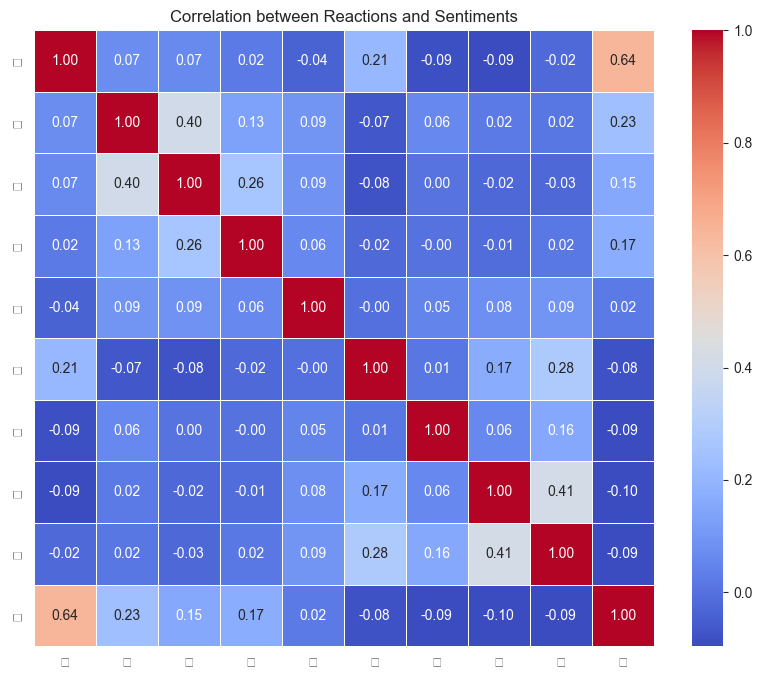

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [47]:
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,👍,👏,🔥,😁,😱,🤔,🤬,🤯,🥰,sentiment
0,2022-12-18 17:44:04+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5968,Донецк в огне. Больницу им. Калинина эвакуирую...,1099760830,text,...,139.0,NaN,24.0,106.0,480.0,17.0,3827.0,18.0,3.0,Negative
1,2022-12-18 15:53:03+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5967,"А вот еще одна проблема, про которую узнала от...",1099760830,text,...,6593.0,76.0,201.0,437.0,176.0,31.0,157.0,50.0,25.0,Negative
2,2022-12-18 10:11:34+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5966,Вчера в Луганске посетили госпиталь. 1195 паци...,1099760830,text,...,3691.0,129.0,74.0,71.0,1.0,8.0,19.0,NaN,7.0,Negative
3,2022-12-17 22:45:28+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5965,"Ой, ну ладно вам. Мы живы. ПВО сработало\n\nht...",1099760830,text,...,1063.0,NaN,NaN,139.0,53.0,40.0,22.0,7.0,NaN,Negative
4,2022-12-17 12:40:48+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5964,Поговорили с Андреем Турчаком @turchak_andrey ...,1099760830,text,...,1626.0,385.0,111.0,50.0,4.0,22.0,27.0,5.0,135.0,Positive


In [54]:
df_all.columns

Index(['\U0001fae1', 'date', 'duration', 'frw_from_name', 'frw_from_title',
       'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle', 'id', 'message',
       'sentiment', 'to_id', 'type', 'views', '⚡', '✍', '❤', '❤\u200d🔥', '🌚',
       '🌭', '🍌', '🍓', '🍾', '🎃', '🎉', '🏆', '🐳', '👀', '👌', '👍', '👎', '👏',
       '👨\u200d💻', '👻', '💋', '💔', '💩', '💯', '🔥', '🕊', '🖕', '😁', '😇', '😈', '😍',
       '😐', '😒', '😢', '😨', '😭', '😱', '😳', '😴', '🙈', '🙏', '🤓', '🤔', '🤗', '🤝',
       '🤡', '🤣', '🤨', '🤩', '🤬', '🤮', '🤯', '🥰', '🥱', '🥴'],
      dtype='object')

In [55]:
df_all.iloc[0]

\U0001fae1                              NaN
date              2022-12-18 17:44:04+00:00
duration                                NaN
frw_from_name                           NaN
frw_from_title                          NaN
                            ...            
🤮                                       NaN
🤯                                      18.0
🥰                                       3.0
🥱                                       NaN
🥴                                       NaN
Name: 0, Length: 70, dtype: object

In [57]:
df_all['sentiment'] = df_all['sentiment'].apply(lambda x: x[1])
df_all.head()

,\U0001fae1,date,duration,frw_from_name,frw_from_title,fwd_date,fwd_from_id,fwd_mes_id,handle,id,...,🤡,🤣,🤨,🤩,🤬,🤮,🤯,🥰,🥱,🥴
0,NaN,2022-12-18 17:44:04+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5968,...,NaN,NaN,NaN,NaN,3827.0,NaN,18.0,3.0,NaN,NaN
1,NaN,2022-12-18 15:53:03+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5967,...,NaN,NaN,NaN,NaN,157.0,NaN,50.0,25.0,NaN,NaN
2,NaN,2022-12-18 10:11:34+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5966,...,NaN,NaN,NaN,NaN,19.0,NaN,NaN,7.0,NaN,NaN
3,NaN,2022-12-17 22:45:28+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5965,...,NaN,NaN,NaN,NaN,22.0,NaN,7.0,NaN,NaN,NaN
4,NaN,2022-12-17 12:40:48+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5964,...,NaN,NaN,NaN,NaN,27.0,NaN,5.0,135.0,NaN,NaN


In [58]:
df_all['sentiment'] = df_all['sentiment'].astype('int8')

In [61]:
correlation_matrix = df_all.drop(columns=['date', 'duration', 'frw_from_name', 'frw_from_title',
       'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle', 'id', 'message', 'to_id', 'type', 'views']).corr()

In [62]:
correlation_matrix

,\U0001fae1,sentiment,⚡,✍,❤,❤\u200d🔥,🌚,🌭,🍌,🍓,...,🤡,🤣,🤨,🤩,🤬,🤮,🤯,🥰,🥱,🥴
\U0001fae1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,NaN,1.000000,NaN,NaN,-0.992293,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.259542,NaN,0.480754,-0.988175,NaN,NaN
⚡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
✍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
❤,NaN,-0.992293,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.337687,NaN,-0.422987,0.987085,NaN,NaN
❤\u200d🔥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🌚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🌭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🍌,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🍓,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 127820 (\N{BANANA}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 127870 (\N{BOTTLE WITH POPPING CORK}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.

ValueError: Unknown format code 'd' for object of type 'float'

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127820 (\N{BANANA}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127870 (\N{BOTTLE WITH POPPING CORK}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\f

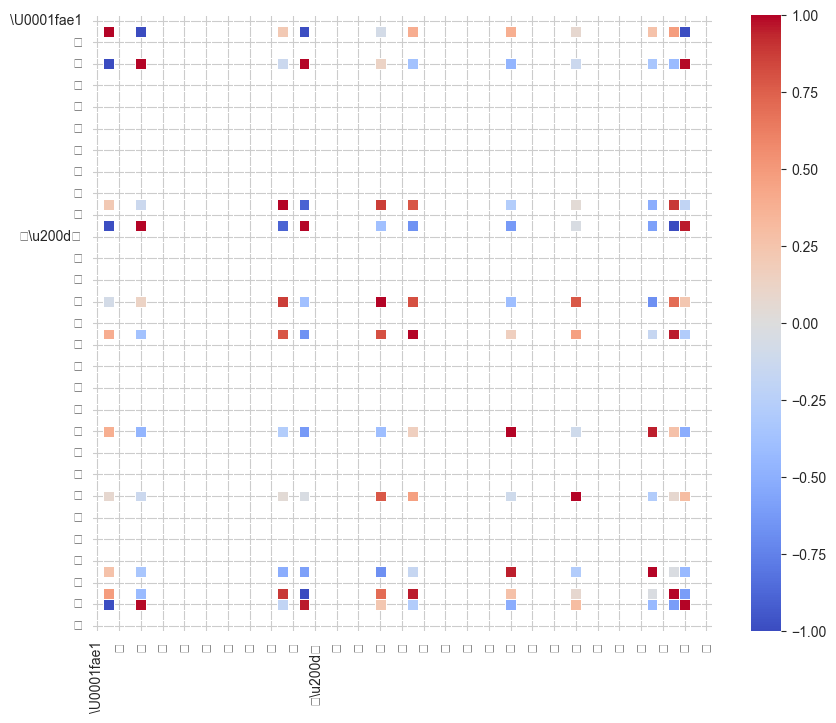

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.dropna(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [84]:
df = read_concat_df(sent_channels[10])

In [85]:
df.columns

Index(['date', 'duration', 'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle',
       'id', 'message', 'to_id', 'type', 'views', '❤', '🎉', '👍', '👎', '👏', '💩',
       '🔥', '😁', '😢', '😱', '🤔', '🤩', '🤬', '🤮', '🤯', '🥰', 'sentiment'],
      dtype='object')

In [86]:
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,😁,😢,😱,🤔,🤩,🤬,🤮,🤯,🥰,sentiment
0,2022-12-16 09:47:42+00:00,NaN,NaT,<NA>,<NA>,denazi_UA,31215,"По данным пабликов Днепропетровска, больше пол...",1783083983,photo,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,[0]
1,2022-12-16 09:44:48+00:00,NaN,NaT,<NA>,<NA>,denazi_UA,31214,"Беспилотники, использованные для украинских ат...",1783083983,text,...,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,[2]
2,2022-12-16 09:39:56+00:00,12.0,NaT,<NA>,<NA>,denazi_UA,31213,Спикер Белого дома Карин Жан-Пьер: Если бы сущ...,1783083983,video,...,209.0,NaN,NaN,NaN,1.0,3.0,NaN,3.0,NaN,[2]
3,2022-12-16 09:15:29+00:00,NaN,NaT,<NA>,<NA>,denazi_UA,31212,💥Украинская ПВО сегодня не справилась с ракетн...,1783083983,text,...,234.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,[0]
4,2022-12-16 09:10:47+00:00,NaN,NaT,<NA>,<NA>,denazi_UA,31211,💥В Кривом Роге ракета украинского ПВО попала в...,1783083983,photo,...,6.0,72.0,18.0,4.0,NaN,NaN,NaN,10.0,NaN,[0]


In [143]:
df_all = pd.concat([read_concat_df(ch) for ch in sent_channels[:20]], ignore_index=True)
df_all.shape

C:\Users\IvarY\AppData\Local\Temp\ipykernel_11808\3408176122.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(INPUT_FOLDER, filename), index_col='Unnamed: 0', dtype=dtype_dict,


(505841, 70)

In [144]:
df_all.query('sentiment.isnull()', engine='python')

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🤝,🤡,🤨,🤩,🥱,✍,😇,😴,🤓,😳
11,2022-12-14 12:22:27+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5957,NaN,1099760830,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2022-12-12 12:13:06+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5952,NaN,1099760830,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2022-12-11 14:20:09+00:00,NaN,2022-12-10 08:34:36,1245682640,11453,akashevarova,5946,NaN,1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2022-12-05 09:46:49+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5928,NaN,1099760830,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2022-11-26 11:56:56+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5915,NaN,1099760830,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468291,2017-02-03 10:39:15+00:00,45.0,NaT,<NA>,<NA>,izvestia,37587,NaN,1003698528,video,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468295,2017-02-02 18:57:56+00:00,71.0,NaT,<NA>,<NA>,izvestia,37583,NaN,1003698528,video,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468308,2017-02-01 04:56:34+00:00,NaN,NaT,<NA>,<NA>,izvestia,37569,NaN,1003698528,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468315,2017-01-31 05:00:50+00:00,NaN,NaT,<NA>,<NA>,izvestia,37561,NaN,1003698528,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df_all = df_all.dropna(subset=['message'])

In [146]:
df_all.query('sentiment.isnull()', engine='python')

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🤝,🤡,🤨,🤩,🥱,✍,😇,😴,🤓,😳


In [148]:
# df_all['sentiment'] = df_all['sentiment'].apply(lambda x: x[1])
df_all['sentiment'] = df_all['sentiment'].str.extract('(\d+)').astype('int8')
df_all.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🤝,🤡,🤨,🤩,🥱,✍,😇,😴,🤓,😳
0,2022-12-18 17:44:04+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5968,Донецк в огне. Больницу им. Калинина эвакуирую...,1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-18 15:53:03+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5967,"А вот еще одна проблема, про которую узнала от...",1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-18 10:11:34+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5966,Вчера в Луганске посетили госпиталь. 1195 паци...,1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-17 22:45:28+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5965,"Ой, ну ладно вам. Мы живы. ПВО сработало\n\nht...",1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-17 12:40:48+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5964,Поговорили с Андреем Турчаком @turchak_andrey ...,1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
type(df_all['sentiment'][0])

numpy.int8

In [150]:
df_all['sentiment'] = df_all['sentiment'].replace(2, -1)

In [151]:
df_all.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🤝,🤡,🤨,🤩,🥱,✍,😇,😴,🤓,😳
0,2022-12-18 17:44:04+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5968,Донецк в огне. Больницу им. Калинина эвакуирую...,1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-18 15:53:03+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5967,"А вот еще одна проблема, про которую узнала от...",1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-18 10:11:34+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5966,Вчера в Луганске посетили госпиталь. 1195 паци...,1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-17 22:45:28+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5965,"Ой, ну ладно вам. Мы живы. ПВО сработало\n\nht...",1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-17 12:40:48+00:00,NaN,NaT,<NA>,<NA>,akashevarova,5964,Поговорили с Андреем Турчаком @turchak_andrey ...,1099760830,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_all.columns

Index(['date', 'duration', 'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle',
       'id', 'message', 'to_id', 'type', 'views', '❤', '👍', '👏', '🔥', '😁', '😱',
       '🤔', '🤬', '🤯', '🥰', 'sentiment', 'frw_from_name', 'frw_from_title', '👎',
       '😢', '🤣', '🤮', '🥴', '👌', '💩', '😒', '🙏', '\U0001fae1', '⚡', '❤\u200d🔥',
       '🌚', '🌭', '🍌', '🍓', '🍾', '🎃', '🎉', '🏆', '🐳', '👀', '👨\u200d💻', '👻', '💋',
       '💔', '💯', '🕊', '🖕', '😈', '😍', '😐', '😨', '😭', '🙈', '🤗', '🤝', '🤡', '🤨',
       '🤩', '🥱', '✍', '😇', '😴', '🤓', '😳'],
      dtype='object')

In [155]:
correlation_matrix = \
    df_all[['sentiment', '❤', '🤬', '😁', '🔥', '👍', '😱', '🤣', '🤮', '😢', '🤡', '🤩']].corr()

In [156]:
correlation_matrix

,sentiment,❤,🤬,😁,🔥,👍,😱,🤣,🤮,😢,🤡,🤩
sentiment,1.000000,0.047633,-0.072600,0.020177,0.004228,-0.028780,-0.048444,0.036620,0.077273,-0.053412,0.036245,0.027045
❤,0.047633,1.000000,-0.048459,-0.061498,0.103715,0.135174,-0.057548,-0.060606,-0.109891,0.005847,-0.094867,0.005031
🤬,-0.072600,-0.048459,1.000000,-0.118909,-0.045898,-0.088268,0.032623,-0.131410,-0.131016,-0.043364,-0.116365,-0.046421
😁,0.020177,-0.061498,-0.118909,1.000000,0.036299,-0.013154,-0.005981,0.283982,-0.052510,-0.092714,0.060530,0.053573
🔥,0.004228,0.103715,-0.045898,0.036299,1.000000,0.177584,-0.024066,-0.015302,-0.086240,-0.036950,-0.072304,0.054517
👍,-0.028780,0.135174,-0.088268,-0.013154,0.177584,1.000000,-0.042879,-0.102093,-0.161754,-0.000746,-0.095004,0.047591
😱,-0.048444,-0.057548,0.032623,-0.005981,-0.024066,-0.042879,1.000000,-0.055652,0.009562,0.063699,-0.089195,0.083612
🤣,0.036620,-0.060606,-0.131410,0.283982,-0.015302,-0.102093,-0.055652,1.000000,-0.127798,-0.103976,-0.082618,0.071942
🤮,0.077273,-0.109891,-0.131016,-0.052510,-0.086240,-0.161754,0.009562,-0.127798,1.000000,-0.121195,0.072762,-0.029259
😢,-0.053412,0.005847,-0.043364,-0.092714,-0.036950,-0.000746,0.063699,-0.103976,-0.121195,1.000000,-0.100786,-0.042786


C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128513 (\N{GRINNING FACE WITH SMILING EYES}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\si

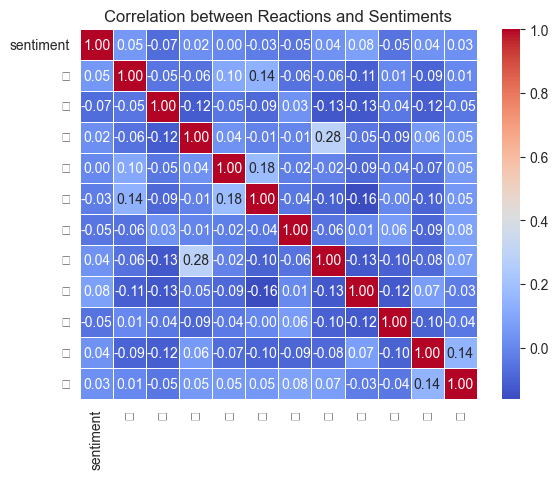

In [157]:
plt.figure()
sns.heatmap(correlation_matrix.dropna(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [160]:
correlation_matrix.columns

Index(['sentiment', '❤', '🤬', '😁', '🔥', '👍', '😱', '🤣', '🤮', '😢', '🤡', '🤩'], dtype='object')

In [173]:
# Define the columns to sum
columns_to_sum = ['👎', '😢', '🤣', '🤮', '🥴', '👌', '💩', '😒', '🙏', '⚡', '🌚', '🌭', '🍌', '🍓', '🍾', '🎃', '🎉', '🏆', '🐳', '👀', '👻', '💋', '💔', '💯', '🕊', '🖕', '😈', '😍', '😐', '😨', '😭', '🙈', '🤗', '🤝', '🤡', '🤨', '🤩', '🥱', '✍', '😇', '😴', '🤓', '😳', '❤', '👍', '👏', '😁', '😱', '🤔', '🤬', '🤯', '🥰']

# Filter the DataFrame based on conditions
df_fire_msg = df_all[(df_all['sentiment'] == -1) & (df_all['🔥'] > df_all[columns_to_sum].sum(axis=1) / 3)]

In [174]:
df_fire_msg[['message', '🔥', 'sentiment']]

,message,🔥,sentiment
45,"Сань, ты про импотентов забыл\n\nhttps://t.me/...",907.0,-1
131,"Господи, последняя эмоция, клянусь, и дальше р...",8467.0,-1
325,Когда летят наши ракеты я думаю о годах издева...,9043.0,-1
427,Да мужики вы или нет? Будут у вас яйца или нет...,40728.0,-1
454,"Так, покричали «Россия!». Настасья ваша даже п...",544.0,-1
...,...,...,...
428630,👤Андрей Турчак подарил девочке из Донбасса еди...,1.0,-1
430662,🚨В Нью-Йорке в результате взрыва газа разрушен...,1.0,-1
432840,👏«Железная бабушка» Мария Колтакова в свой 100...,4.0,-1
432852,👤Начальник радиотехнических войск ВКС России А...,12.0,-1


In [181]:
df_fire_msg.loc[427]['message']

'Да мужики вы или нет? Будут у вас яйца или нет? Че вы все мнётесь, все слова какие-то подыскиваете, а то мало ли. Все не можете назвать фамилии и имена. Лапина своими ссыкунскими постами защищаете.\n\nТак и скажите, ладно, х.. с ним, с Лапиным, у нас вопросы к главе Генштаба Герасимову и министру обороны Шойгу. Тьфу на вас. У меня у одной из блогеров-журналистов в этой стране яйца.\n\nИтак, товарищи Шойгу и Герасимов, тут хотят спросить, но вроде как неположено и в штаны нассали пока формулировали. \n\nПрезидент о происходящем знает? Кто ему докладывает? \n\nГде снабжение? Где Армата? Где все? Как так получилось? Спиздили? Продали? Куда дели? Были ли вообще? \n\nПо Изюму, Балаклее, Лиману - почему ни хера не сделали? Почему не было усилено направление? Почему за 8 месяцев не подготовились?\n\nПо мобилизации - вы это специально или нарочно? Почему нельзя нормально ее провести? Правда ли, что многие военкомы получают 16 тысяч рублей и их картотека бумажная и заросла вся мхом, как и сами

In [182]:
correlation_matrix = \
    df_all[['sentiment', '👎', '😢', '🤣', '🤮', '🥴', '👌', '💩', '😒', '🙏', '⚡', '🌚', '🌭', '🍌', '🍓', '🍾', '🎃', '🎉', '🏆', '🐳', '👀', '👻', '💋', '💔', '💯', '🕊', '🖕', '😈', '😍', '😐', '😨', '😭', '🙈', '🤗', '🤝', '🤡', '🤨', '🤩', '🥱', '✍', '😇', '😴', '🤓', '😳', '❤', '👍', '👏', '😁', '😱', '🤔', '🤬', '🤯', '🥰']].corr()

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128530 (\N{UNAMUSED FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils

ValueError: Unknown format code 'd' for object of type 'float'

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128530 (\N{UNAMUSED FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\

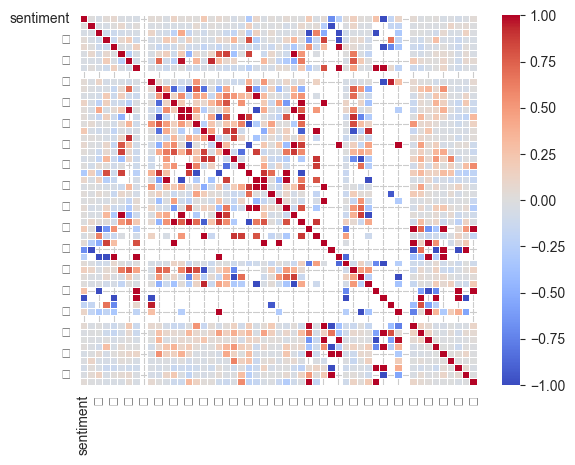

In [185]:
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="d", linewidths=.5)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [186]:
correlation_matrix.columns

Index(['sentiment', '👎', '😢', '🤣', '🤮', '🥴', '👌', '💩', '😒', '🙏', '⚡', '🌚', '🌭',
       '🍌', '🍓', '🍾', '🎃', '🎉', '🏆', '🐳', '👀', '👻', '💋', '💔', '💯', '🕊', '🖕',
       '😈', '😍', '😐', '😨', '😭', '🙈', '🤗', '🤝', '🤡', '🤨', '🤩', '🥱', '✍', '😇',
       '😴', '🤓', '😳', '❤', '👍', '👏', '😁', '😱', '🤔', '🤬', '🤯', '🥰'],
      dtype='object')

In [187]:
correlation_matrix['sentiment']

sentiment    1.000000
👎            0.003041
😢           -0.053412
🤣            0.036620
🤮            0.077273
🥴           -0.023785
👌           -0.034805
💩           -0.047693
😒                 NaN
🙏            0.042108
⚡            0.038820
🌚           -0.035913
🌭            0.120220
🍌            0.026308
🍓            0.039012
🍾            0.014606
🎃            0.213537
🎉            0.014119
🏆            0.073099
🐳            0.029607
👀           -0.060834
👻            0.005301
💋           -0.301481
💔            0.086066
💯           -0.031260
🕊            0.023766
🖕           -0.013740
😈            0.054657
😍            0.010380
😐           -0.009142
😨            0.195526
😭           -0.037003
🙈            0.045038
🤗           -0.693375
🤝           -0.248572
🤡            0.036245
🤨            0.163131
🤩            0.027045
🥱            0.015136
✍            0.260153
😇           -1.000000
😴           -0.187317
🤓            0.107564
😳                 NaN
❤            0.047633
👍         

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 127789 (\N{HOT DOG}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 127875 (\N{JACK-O-LANTERN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128139 (\N{KISS MARK}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128552 (\N{FEARFUL FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 129303 (\N{HUGGING FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph

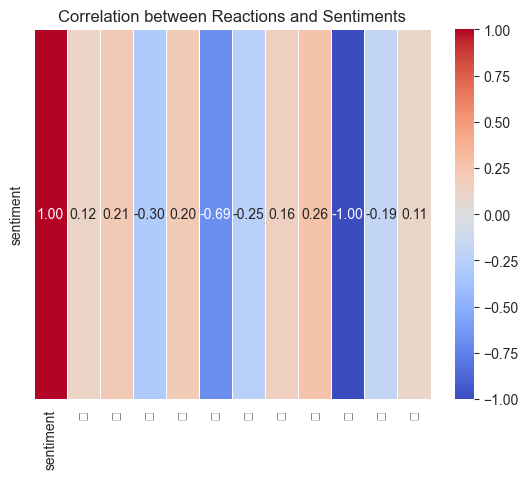

In [194]:
corr_slice = correlation_matrix[['sentiment']].query('sentiment > 0.1 | sentiment < -0.1')
plt.figure()
sns.heatmap(corr_slice.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [196]:
corr_slice.T.columns

Index(['sentiment', '🌭', '🎃', '💋', '😨', '🤗', '🤝', '🤨', '✍', '😇', '😴', '🤓'], dtype='object')

In [410]:
df_all[df_all['😇'] > 0]

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🤨,🤩,🥱,✍,😇,😴,🤓,😳,year,month
130400,2022-12-09 17:45:50+00:00,NaN,NaT,<NA>,<NA>,chtddd,58408,🤡Так депутат отреагировал на расследование жур...,1055562978,photo,...,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,2022,96
131199,2022-12-07 15:13:41+00:00,45.0,NaT,<NA>,<NA>,chtddd,58310,☠️Путин: Угроза ядерной войны нарастает. Росси...,1055562978,video,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2022,96


In [411]:
df_all[df_all['🤗'] > 0]

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🤨,🤩,🥱,✍,😇,😴,🤓,😳,year,month
106415,2022-12-12 09:50:29+00:00,11.0,2022-12-12 09:16:20,1695530473,1611,botcharov,3008,Замёрзшие корабли после сильного шторма на Бай...,1652257917,video,...,NaN,215.0,NaN,NaN,NaN,NaN,NaN,NaN,2022,96
130194,2022-12-10 18:01:26+00:00,10.0,NaT,<NA>,<NA>,chtddd,58435,💬 Новости последних месяцев — это сплошной ист...,1055562978,video,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,96
130930,2022-12-08 11:02:18+00:00,NaN,NaT,<NA>,<NA>,chtddd,58339,🤨Россиянам призывного возраста отказывают в ра...,1055562978,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,96


In [415]:
df_all[df_all['💋'] > 0][['sentiment', 'message', '💋']].sort_values('💋', ascending=False)

,sentiment,message,💋
150531,-1,😏СБУ объявила Медведева в розыск\n\nUPD. И Зах...,52.0
150403,-1,🤷🚀Путин сильно ошибся: российская армия истоще...,16.0
152011,-1,😡На 77-летнюю пенсионерку из Карелии завели уж...,9.0
141206,-1,"🤡Шойгу докладывает Путину, 28 октября: 82 тыся...",8.0
106844,-1,"Так вот ты какая, небесная сотня.",7.0
139747,-1,🤡😏Вот так в Минобороны принимали решение бежат...,7.0
131718,0,Петушиная армия она такая,6.0
150726,-1,гнилая старая шавка,6.0
106506,0,==перерыв в новостях==,5.0
151423,-1,"🤷‍♀️ «Пожили, бл***, и хватит, нах**», — реакц...",5.0


C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128530 (\N{UNAMUSED FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils

ValueError: Format specifier missing precision

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128530 (\N{UNAMUSED FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\

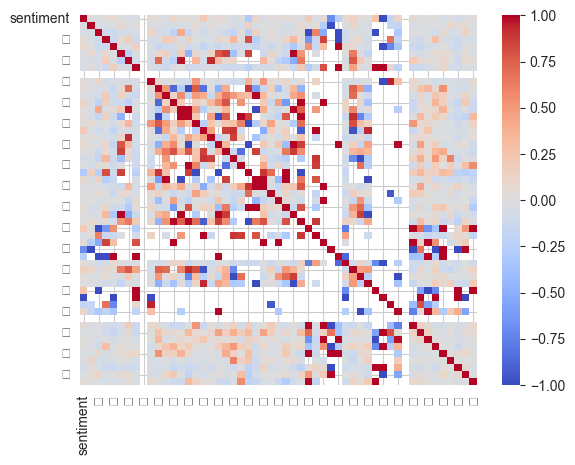

In [324]:
corr_slice = correlation_matrix#.query('sentiment > 0.1 | sentiment < -0.1')
plt.figure()
sns.heatmap(corr_slice.T, annot=True, cmap='coolwarm', fmt=".f", linewidths=0)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [367]:
corr_slice.T.columns

Index(['sentiment', '👎', '😢', '🤣', '🤮', '🥴', '👌', '💩', '🙏', '⚡', '🌚', '🌭', '🍌',
       '🍓', '🍾', '🎃', '🎉', '🏆', '🐳', '👀', '👻', '💋', '💔', '💯', '🕊', '🖕', '😈',
       '😍', '😐', '😨', '😭', '🙈', '🤗', '🤝', '🤡', '🤨', '🤩', '🥱', '✍', '😇', '😴',
       '🤓'],
      dtype='object')

In [330]:
correlation_matrix.shape

(53, 53)

In [352]:
def extract_high_correlation(correlation_matrix, threshold=0.3):
    cm = correlation_matrix.copy()

    # Create a mask to exclude diagonal elements
    mask = np.triu(np.ones(cm.shape), k=1).astype(bool)

    # Apply the mask to the DataFrame
    cm = cm.where(mask)

    cm = cm.where(cm.abs() > threshold)

    return cm.dropna(how='all', axis=1).dropna(how='all', axis=0)

In [354]:
corr_slice = extract_high_correlation(correlation_matrix)

In [358]:
corr_slice

,⚡,🌚,🌭,🍌,🍓,🍾,🎃,🎉,🏆,🐳,...,🤓,❤,👍,👏,😁,😱,🤔,🤬,🤯,🥰
sentiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
👎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
😢,NaN,NaN,NaN,0.419690,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.313647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🤣,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🤮,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.325439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🥴,NaN,NaN,NaN,NaN,-0.475339,NaN,NaN,NaN,0.788142,0.865051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
👌,0.715711,NaN,NaN,0.972078,NaN,0.350153,NaN,0.921967,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
💩,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
🙏,NaN,NaN,NaN,NaN,NaN,0.518073,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
⚡,NaN,0.51693,-0.873093,NaN,-1.000000,0.767299,-0.832240,NaN,-0.493228,0.410451,...,NaN,NaN,NaN,0.343250,NaN,0.542164,NaN,NaN,NaN,NaN


In [360]:
corr_slice.stack().reset_index().sort_values(0, ascending=False).T

,86,205,170,200,29,89,167,85,198,184,...,21,111,199,197,48,158,52,100,92,195
level_0,🌭,🤝,🖕,🤗,🥴,🍌,💯,🌭,🤗,😨,...,🤮,🍾,🤗,🤗,🙏,💋,⚡,🍓,🍌,🤗
level_1,🙈,😱,🙈,🤯,😍,🍓,🙈,😐,😱,❤,...,😇,💋,🤬,😁,😇,😐,🍓,🏆,💔,❤
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages

ValueError: Format specifier missing precision

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\IvarY\U

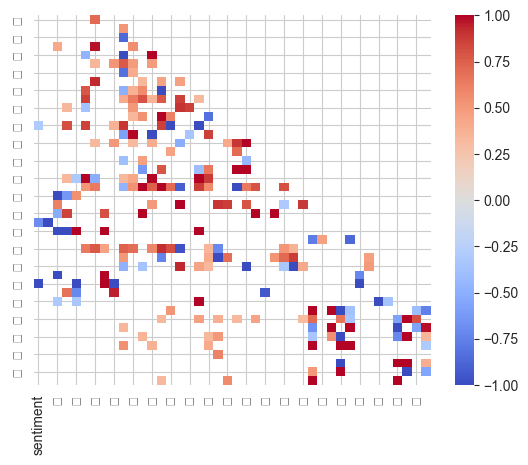

In [355]:
plt.figure()
sns.heatmap(corr_slice.T, annot=True, cmap='coolwarm', fmt=".f", linewidths=0)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [110]:
correlation_matrix = df_all[['sentiment', '❤', '🤬', '😁', '🔥', '👍']].corr()

In [111]:
correlation_matrix

,sentiment,❤,🤬,😁,🔥,👍
sentiment,1.000000,0.992293,-0.259542,-0.390825,0.075839,-0.216407
❤,0.992293,1.000000,-0.337687,-0.371492,0.125298,-0.126556
🤬,-0.259542,-0.337687,1.000000,-0.159894,-0.676659,-0.513556
😁,-0.390825,-0.371492,-0.159894,1.000000,0.811338,0.786634
🔥,0.075839,0.125298,-0.676659,0.811338,1.000000,0.872834
👍,-0.216407,-0.126556,-0.513556,0.786634,0.872834,1.000000


C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128513 (\N{GRINNING FACE WITH SMILING EYES}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\IvarY\University\CSS\final_project\venv\lib\si

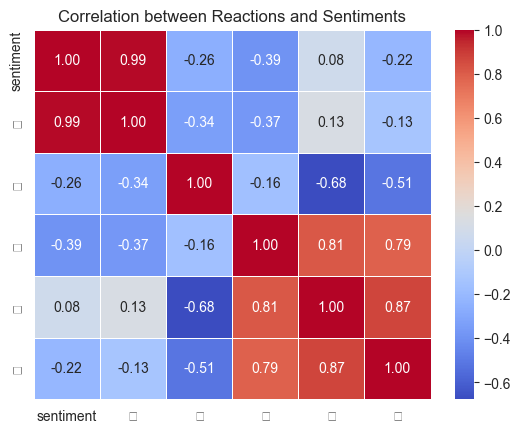

In [103]:
plt.figure()
sns.heatmap(correlation_matrix.dropna(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Reactions and Sentiments')
plt.show()

In [102]:
correlation_matrix.columns

Index(['sentiment', '❤', '🤬', '😁', '🔥', '👍'], dtype='object')

In [112]:
df_all.shape

(5, 70)

In [113]:
df_all

,\U0001fae1,date,duration,frw_from_name,frw_from_title,fwd_date,fwd_from_id,fwd_mes_id,handle,id,...,🤡,🤣,🤨,🤩,🤬,🤮,🤯,🥰,🥱,🥴
0,NaN,2022-12-18 17:44:04+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5968,...,NaN,NaN,NaN,NaN,3827.0,NaN,18.0,3.0,NaN,NaN
1,NaN,2022-12-18 15:53:03+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5967,...,NaN,NaN,NaN,NaN,157.0,NaN,50.0,25.0,NaN,NaN
2,NaN,2022-12-18 10:11:34+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5966,...,NaN,NaN,NaN,NaN,19.0,NaN,NaN,7.0,NaN,NaN
3,NaN,2022-12-17 22:45:28+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5965,...,NaN,NaN,NaN,NaN,22.0,NaN,7.0,NaN,NaN,NaN
4,NaN,2022-12-17 12:40:48+00:00,NaN,NaN,NaN,NaT,<NA>,<NA>,akashevarova,5964,...,NaN,NaN,NaN,NaN,27.0,NaN,5.0,135.0,NaN,NaN


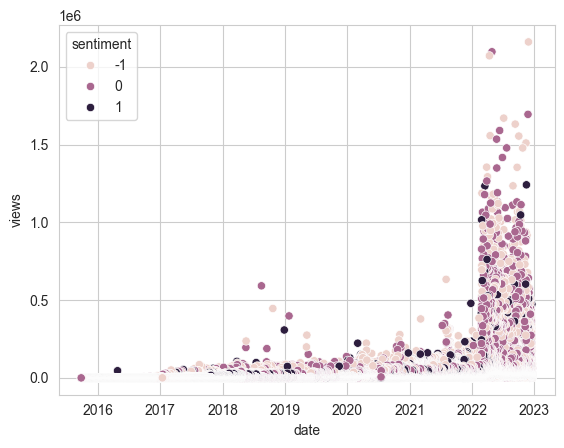

In [198]:
ax = sns.scatterplot(x='date', y='views', data=df_all, hue='sentiment')

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


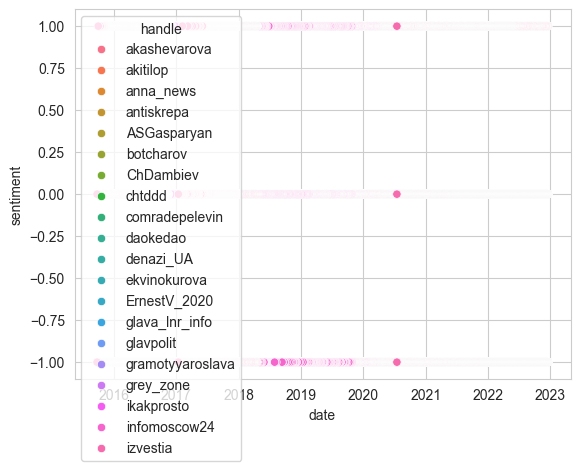

In [199]:
ax = sns.scatterplot(x='date', y='sentiment', data=df_all, hue='handle')

In [202]:
ax = sns.heatmap(x='date', y='sentiment', data=df_all)

TypeError: float() argument must be a string or a number, not 'Timestamp'

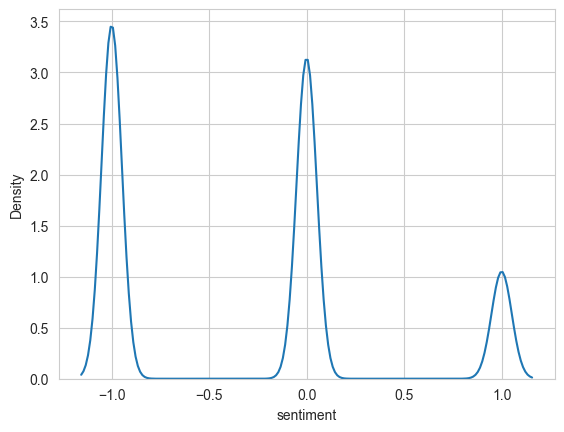

In [203]:
ax = sns.kdeplot(x='sentiment', data=df_all)

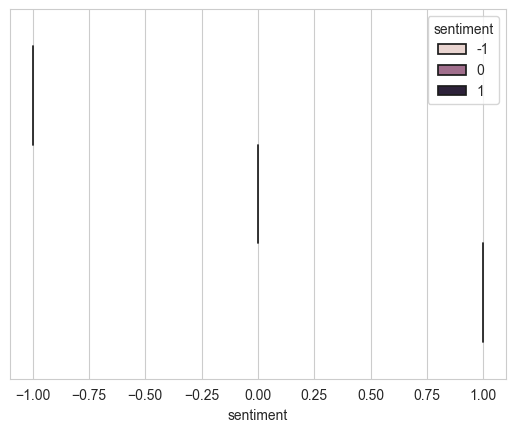

In [209]:
ax = sns.violinplot(x='sentiment',data=df_all.head(500), hue='sentiment')

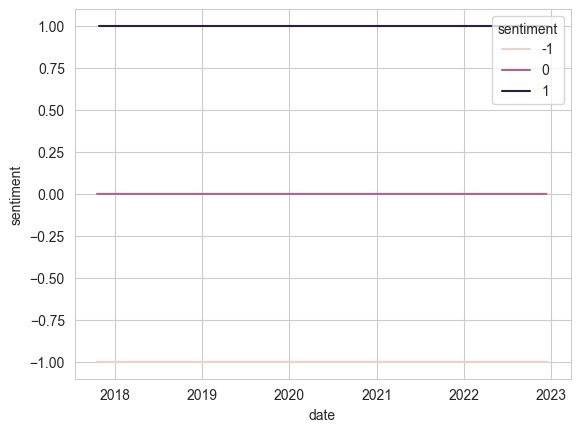

In [213]:
ax = sns.lineplot(x='date', y='sentiment', data=df_all.head(5000), hue='sentiment', estimator='mean')

In [214]:
df_all['year'] = df_all['date'].dt.year

In [223]:
df_all['month'] = \
    df_all['date'].dt.month + (df_all['year'] - df_all['year'].min()) * 12

In [247]:
df_all.groupby('month').sum('sentiment')

,duration,fwd_from_id,fwd_mes_id,id,to_id,views,❤,👍,👏,🔥,...,🤡,🤨,🤩,🥱,✍,😇,😴,🤓,😳,year
month,,,,,,,,,,,,,,,,,,,,,
9,0.0,0,0,486,25092463200,6.222000e+03,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50375
10,0.0,0,0,109144,434601462624,9.356000e+04,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872495
11,0.0,0,0,3122991,2074644857376,2.221120e+05,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4165005
12,0.0,0,0,8039968,2209140460128,4.106670e+05,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4435015
13,0.0,0,0,7431688,1371052189248,4.255890e+05,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2753856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,282921.0,2193289277279,36984611,1355465247,30456583647154,6.093940e+08,960289.0,2872262.0,118626.0,1172858.0,...,41149.0,132.0,3565.0,133.0,0.0,0.0,0.0,0.0,0.0,42955368
93,368376.0,3476816751149,69321761,3164975093,37859648821977,8.869456e+08,1735784.0,4710032.0,171516.0,1530086.0,...,240525.0,456.0,3610.0,425.0,0.0,0.0,0.0,0.0,0.0,52772178
94,411269.0,3439460205898,71687246,5218426405,40234506683446,1.031188e+09,1625085.0,6715462.0,259758.0,2472430.0,...,493508.0,549.0,7430.0,563.0,0.0,0.0,0.0,0.0,0.0,55861794


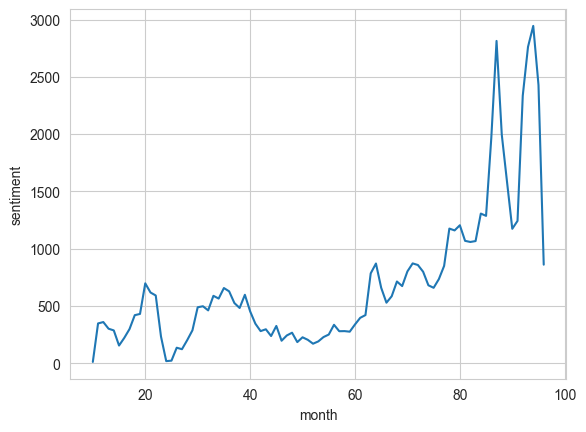

In [250]:
ax = sns.lineplot(x='month', y='sentiment', data=df_all.query('sentiment == 1').groupby('month').sum('sentiment')
                  # , hue='sentiment'
                  )

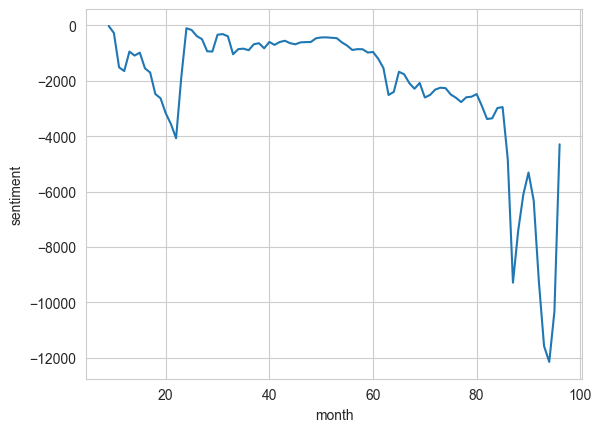

In [252]:
ax = sns.lineplot(x='month', y='sentiment', data=df_all.query('sentiment == -1').groupby('month').sum('sentiment')
                  # , hue='sentiment'
                  )

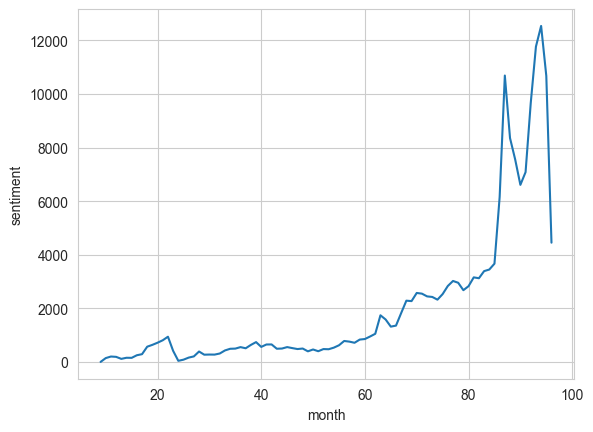

In [254]:
ax = sns.lineplot(x='month', y='sentiment', data=df_all.query('sentiment == 0').groupby('month').count()
                  # , hue='sentiment'
                  )

In [255]:
df_all.query('sentiment == 0').groupby('month').count()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🤡,🤨,🤩,🥱,✍,😇,😴,🤓,😳,year
month,,,,,,,,,,,,,,,,,,,,,
9,7,0,0,0,0,7,7,7,7,7,...,0,0,0,0,0,0,0,0,0,7
10,150,0,0,0,0,150,150,150,150,150,...,0,0,0,0,0,0,0,0,0,150
11,208,0,0,0,0,208,208,208,208,208,...,0,0,0,0,0,0,0,0,0,208
12,196,0,0,0,0,196,196,196,196,196,...,0,0,0,0,0,0,0,0,0,196
13,121,0,0,0,0,121,121,121,121,121,...,0,0,0,0,0,0,0,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,9664,2100,648,648,648,9664,9664,9664,9664,9664,...,96,5,382,4,0,0,0,0,0,9664
93,11765,2410,1106,1106,1106,11765,11765,11765,11765,11765,...,290,19,351,16,0,0,0,0,0,11765
94,12537,2554,1095,1095,1094,12537,12537,12537,12537,12537,...,556,27,544,35,0,0,0,0,0,12537


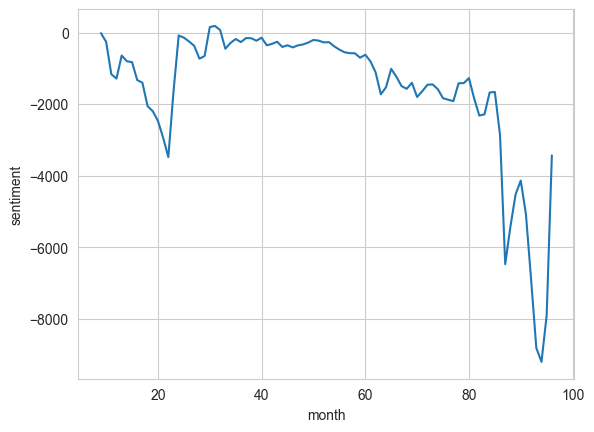

In [259]:
ax = sns.lineplot(x='month', y='sentiment', data=df_all.groupby('month').sum('sentiment')
                  # , hue='sentiment'
                  )

Text(0.5, 1.0, 'Views per month')

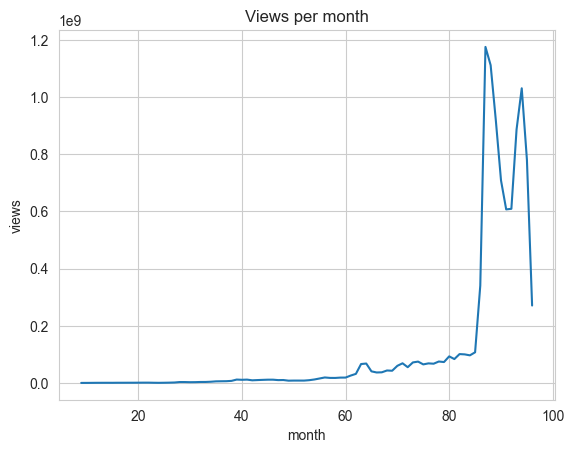

In [454]:
ax = sns.lineplot(x='month', y='views', data=df_all.groupby('month').sum('views')
                  # , hue='sentiment'
                  )
ax.set_title('Views per month')

In [452]:
# df_temp = df_all.groupby(['month']).value_counts() \
#     .reset_index().sort_values(['month','sentiment'], ascending=[False, False])#[['month', 'sentiment', 'handle']]
df_temp = df_all.groupby(['month'])
df_temp = df_temp['sentiment'].value_counts().reset_index()
df_temp

,month,sentiment,count
0,9,-1,18
1,9,0,7
2,10,-1,272
3,10,0,150
4,10,1,11
...,...,...,...
258,95,-1,10327
259,95,1,2428
260,96,0,4454
261,96,-1,4291


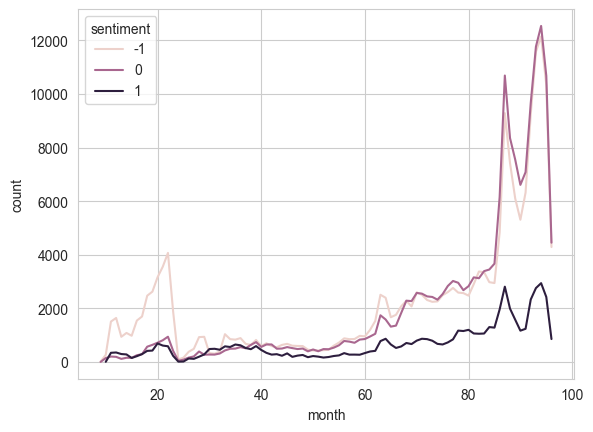

In [453]:
ax = sns.lineplot(x='month', y='count', data=df_temp
                  , hue='sentiment'
                  )

In [361]:
df_temp = df_all.query('month > 75 & month < 97').groupby(['month', 'handle']).sum('views').reset_index().reset_index().groupby('month').apply(lambda x: x.nlargest(3, 'views')).reset_index(drop=True).sort_values(['month','views'], ascending=[False, False])[['month', 'handle', 'views']]

Text(0.5, 1.0, 'Top 3 channels by views per month')

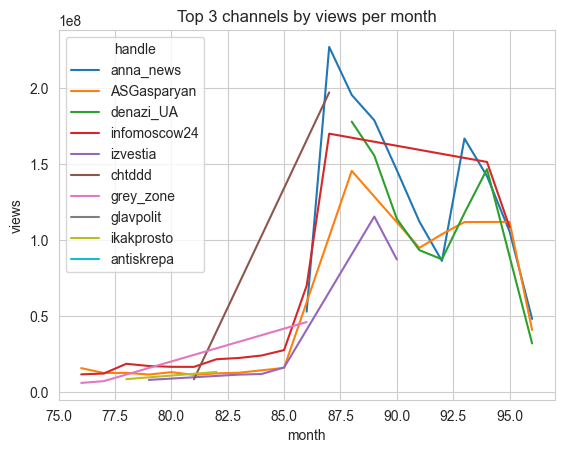

In [362]:
ax = sns.lineplot(x='month', y='views', data=df_temp, hue='handle')
ax.set_title('Top 3 channels by views per month')

In [392]:
df_temp = df_all.query('month > 75 & month < 97').groupby(['month', 'handle']).sum('views').reset_index().reset_index().groupby('month').apply(lambda x: x.nlargest(2, 'views')).reset_index(drop=True).sort_values(['month','views'], ascending=[False, False])[['month', 'handle', 'views']]

In [394]:
df_temp

,month,handle,views
40,96,anna_news,48340430.0
41,96,ASGasparyan,41071563.0
38,95,ASGasparyan,112167186.0
39,95,infomoscow24,108742755.0
36,94,infomoscow24,151595089.0
37,94,denazi_UA,146873431.0
34,93,anna_news,166987766.0
35,93,denazi_UA,117978866.0
32,92,ASGasparyan,104095306.0
33,92,denazi_UA,87542200.0


Text(0.5, 1.0, 'Top 2 channels by views per month')

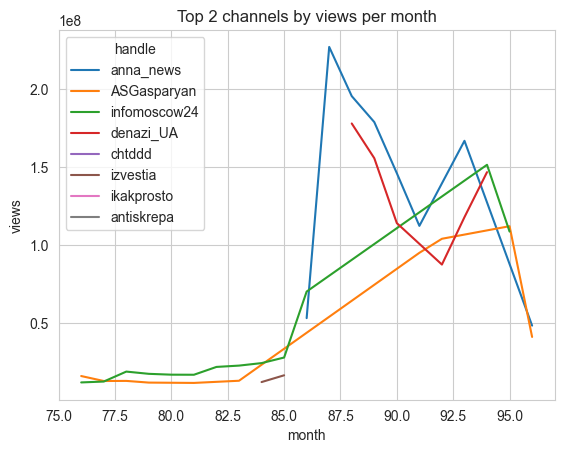

In [393]:
ax = sns.lineplot(x='month', y='views', data=df_temp, hue='handle')
ax.set_title('Top 2 channels by views per month')

In [365]:
df_temp = df_all.query('month > 75 & month < 97').groupby(['month', 'handle']).sum('views').reset_index().reset_index().groupby('month').apply(lambda x: x.nlargest(4, 'views')).reset_index(drop=True).sort_values(['month','views'], ascending=[False, False])[['month', 'handle', 'views']]

Text(0.5, 1.0, 'Top 4 channels by views per month')

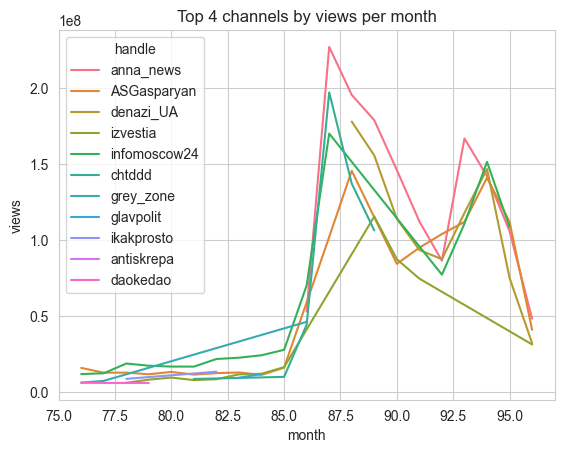

In [366]:
ax = sns.lineplot(x='month', y='views', data=df_temp, hue='handle')
ax.set_title('Top 4 channels by views per month')

In [368]:
df_temp = df_all.query('month > 75 & month < 97').groupby(['month', 'handle']).sum('views').reset_index().reset_index().groupby('month').apply(lambda x: x.nlargest(7, 'views')).reset_index(drop=True).sort_values(['month','views'], ascending=[False, False])[['month', 'handle', 'views']]

Text(0.5, 1.0, 'Top 7 channels by views per month')

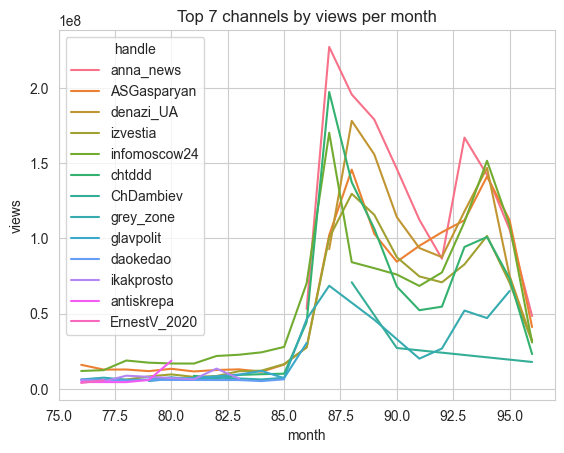

In [370]:
ax = sns.lineplot(x='month', y='views', data=df_temp, hue='handle')
ax.set_title('Top 7 channels by views per month')

In [373]:
df_temp = df_all.query('month > 75 & month < 97').groupby(['month', 'handle']).sum('views').reset_index().reset_index().sort_values(['month','views'], ascending=[False, False])[['month', 'handle', 'views']]

Text(0.5, 1.0, 'Top channels by views per month')

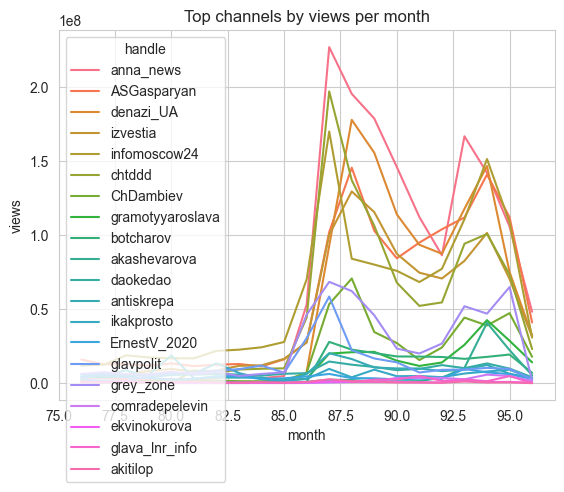

In [376]:
ax = sns.lineplot(x='month', y='views', data=df_temp, hue='handle')
ax.set_title('Top channels by views per month')

In [425]:
df_all['date'].min()

Timestamp('2015-09-24 11:05:54+0000', tz='UTC')

In [426]:
df_all['date'].max()

Timestamp('2022-12-18 17:44:04+0000', tz='UTC')

In [380]:
df_all.query('month > 75 & month < 97')['date'].min()

Timestamp('2021-04-01 03:24:05+0000', tz='UTC')

In [381]:
df_all.query('month > 75 & month < 97')['date'].max()

Timestamp('2022-12-18 17:44:04+0000', tz='UTC')

In [382]:
df_all.query('month > 85 & month < 90')['date'].min()

Timestamp('2022-02-01 00:29:52+0000', tz='UTC')

In [383]:
df_all.query('month > 85 & month < 90')['date'].max()

Timestamp('2022-05-31 23:59:09+0000', tz='UTC')

In [455]:
df_temp = df_all.query('handle == "anna_news" & date > "2022-02-01 00:29:52+0000" & date < "2022-12-01 23:59:59+0000"')

Text(0.5, 1.0, '"anna_news" views')

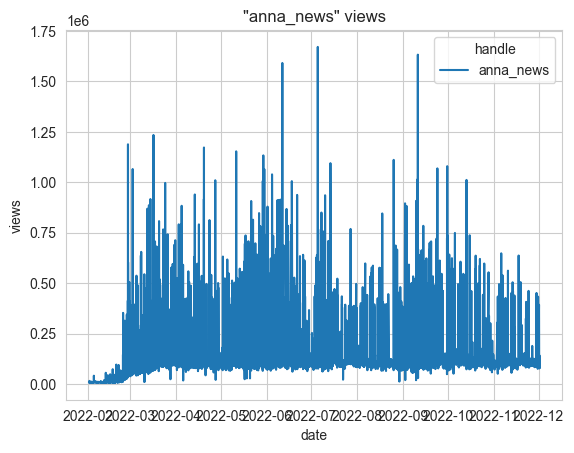

In [456]:
ax = sns.lineplot(x='date', y='views', data=df_temp, hue='handle', estimator='mean')
ax.set_title('"anna_news" views')

In [391]:
ax = sns.boxplot(x='date', y='views', data=df_temp)

Error in callback <function flush_figures at 0x0000017FFA37F160> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [303]:
df_all.shape

(438568, 72)